In [3]:
import numpy as np
from functions import *
from numpy.linalg import inv, qr
import matplotlib.pyplot as plt
import jax.numpy as jnp

In [4]:
n_left = 5
n_right = 3
k_dim = 2

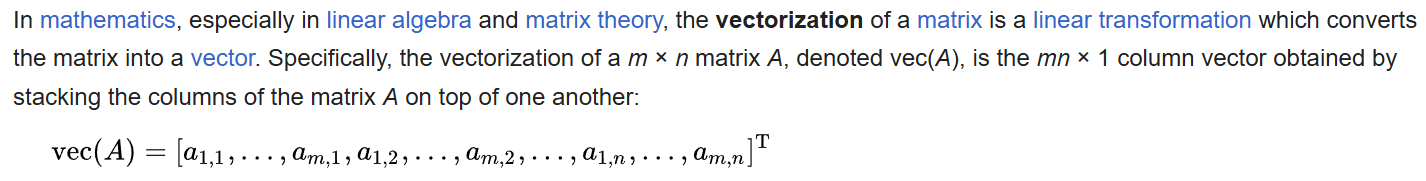

In [5]:
def vec(A):
    return A.T.reshape(-1)


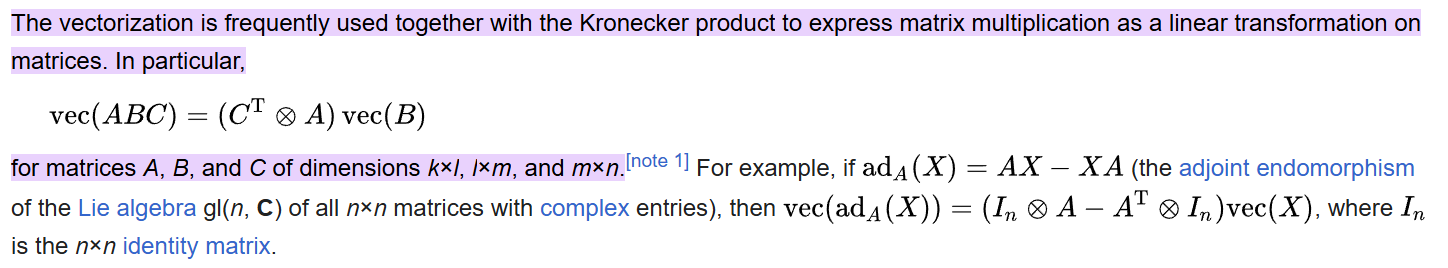

In [6]:
k = n_right
l = n_right
B = np.random.rand(k, l)

m = n_left
n = n_left
A = np.random.rand(m, n)

V = np.random.rand(l, m)

# formula
term1 = vec(B @ V @ A.T)
print(term1)

# brute force
KP = np.kron(A, B)
term2 = KP @ vec(V)
print(term2)

[0.21098882 0.63841575 0.87262978 1.04711365 1.67909032 3.02411173
 0.80327745 1.14474739 2.19884965 0.81722282 1.16876678 2.16965909
 0.36615713 0.49635094 0.94865428]
[0.21098882 0.63841575 0.87262978 1.04711365 1.67909032 3.02411173
 0.80327745 1.14474739 2.19884965 0.81722282 1.16876678 2.16965909
 0.36615713 0.49635094 0.94865428]


In [7]:
k = n_right
l = n_right
B = np.random.randn(k, l)

m = n_left
n = n_left
A = np.random.randn(m, n)

# now we generate a (PxK) matrix, where k_dim = 1 so (Px1)
V = np.random.randn(n_left*n_right)
print(V.shape)

# brute force
KP = np.kron(A, B)
term2 = KP @ vec(V)
print(term2)


# formula, must change V into n_right x n_left form
V_reshaped = V.reshape(n_right, n_left)
term1 = vec(B @ V_reshaped @ A.T)
print(term1)

## NOTE !!! - they are slightly different when we started with a PxK V and then reshaped
## in the previous example, we generated V to be (n_right, n_left) and that was fine

print('\n')
print(term1-term2)


(15,)
[-5.57464237  7.60610588 -7.12525957 -0.32108241 -0.67984126 -1.75388844
  0.70390499  0.0787863   2.0360661  -1.83544762  2.959112   -1.05280445
 -2.60527807  3.89372466 -1.95596292]
[ 1.95169137 -6.56954596 -1.03240321 -0.15846242  2.30716351  2.0964959
 -2.31479946 -0.65188005 -6.80816558  0.84640775 -1.09515048  0.91001575
  0.51341782 -1.42677087 -0.49643349]


[  7.52633374 -14.17565184   6.09285636   0.16261998   2.98700477
   3.85038434  -3.01870446  -0.73066635  -8.84423168   2.68185537
  -4.05426247   1.96282019   3.11869589  -5.32049553   1.45952944]


In [8]:
## why?
key = jax.random.PRNGKey(12)

V1 = jax.random.normal(key, shape=(n_right, n_left))
V2 = jax.random.normal(key, shape=(n_left*n_right, 1))
V2_reshaped = V2.reshape(n_right, n_left)

print(V1)
print('--')
print(V2_reshaped)

term1_V1 = vec(B @ V1 @ A.T)
term1_V2 = vec(B @ V2_reshaped @ A.T)

print(term1_V1)
print('--')
print(term1_V2)

term2_V1 = KP @ vec(V1)
term2_V2 = KP @ vec(V2_reshaped)

print(term2_V1)
print('--')
print(term2_V2)

[[ 0.29981548  1.0307399   0.64020723 -1.5756007   2.16129   ]
 [ 0.2117739  -2.0117774  -0.999066    1.5561429   1.4858311 ]
 [ 0.18778    -1.4641176  -0.93344206 -2.3797116  -0.04247228]]
--
[[ 0.29981548  1.0307399   0.64020723 -1.5756007   2.16129   ]
 [ 0.2117739  -2.0117774  -0.999066    1.5561429   1.4858311 ]
 [ 0.18778    -1.4641176  -0.93344206 -2.3797116  -0.04247228]]
[ 10.303085   -19.026627     8.383074     5.404161    -7.361294
   6.5214686    0.6916917    1.5153409    1.4661736   -1.4395353
   4.81431      0.60627663   4.8586984   -4.333208     6.3430476 ]
--
[ 10.303085   -19.026627     8.383074     5.404161    -7.361294
   6.5214686    0.6916917    1.5153409    1.4661736   -1.4395353
   4.81431      0.60627663   4.8586984   -4.333208     6.3430476 ]
[ 10.303086   -19.026628     8.383074     5.404161    -7.3612943
   6.521469     0.6916921    1.5153418    1.4661738   -1.4395351
   4.8143106    0.60627675   4.8586984   -4.3332067    6.3430467 ]
--
[ 10.303086   -19.0266

In [9]:
B = np.random.randn(n_right, n_right)
A = np.random.randn(n_left, n_left)
KP = np.kron(A, B)

P = n_left*n_right
V = jax.random.normal(key=jax.random.PRNGKey(8), shape=(P,1))
V_reshaped = V.reshape(n_right, n_left)

ans1 = KP @ vec(V_reshaped)      # this is exactly GV
print(ans1)

ans2 = vec(B @ V_reshaped @ A.T)
print(ans2)


## these are not the same
print(vec(V))
print(vec(V_reshaped))

### SOLVED -- the matrix that is in V

[ 0.25776094 -2.9860983   1.4653196  -0.17482674 -3.5804772   2.4805527
  0.74992824  4.788687   -3.6412761  -1.0483828  -4.2193346   2.9723258
  1.3290974   2.5242543  -2.5524893 ]
[ 0.25776082 -2.986098    1.46532    -0.17482679 -3.580477    2.480553
  0.7499279   4.7886868  -3.6412764  -1.0483828  -4.2193346   2.9723256
  1.3290974   2.5242536  -2.5524893 ]


[-0.16026826  0.08418279  1.1607567   0.9374712   0.9473545  -0.36674717
  1.6962515   1.6361771  -0.25147244 -0.64053565  0.78452545 -0.28280613
  1.0416751  -0.82594883  0.10770215]
[-0.16026826 -0.36674717  0.78452545  0.08418279  1.6962515  -0.28280613
  1.1607567   1.6361771   1.0416751   0.9374712  -0.25147244 -0.82594883
  0.9473545  -0.64053565  0.10770215]


In [10]:
V = np.array([1, 4, 6, 3, 7, 9])
Vnew = np.reshape(V, (3,2), order='C')

M = np.random.randn(3,2)
M_vec = np.reshape(M, (6,1), order='C')
print(M)
print(M_vec)

[[ 0.85356724 -0.23262056]
 [-0.97584633 -0.47995949]
 [ 1.15263499  0.16800677]]
[[ 0.85356724]
 [-0.23262056]
 [-0.97584633]
 [-0.47995949]
 [ 1.15263499]
 [ 0.16800677]]


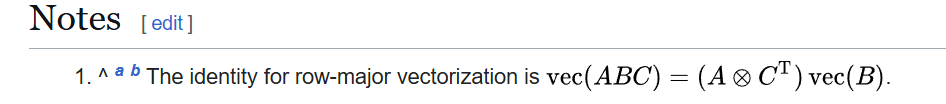

In [11]:
B = np.random.randn(n_right, n_right)
A = np.random.randn(n_left, n_left)
KP = np.kron(A, B)

P = n_left*n_right
V = jax.random.normal(key=jax.random.PRNGKey(8), shape=(P,1))
V_reshaped = V.reshape(n_left, n_right)

ans1 = KP @ vec(V)      # this is exactly GV
print(ans1)

ans2 = row_vec(A @ V_reshaped @ B.T)
print(ans2)

ans3 = KP @ (np.reshape(V, (n_left*n_right, 1), order='C'))
print(ans3)
## this is using row-maho


[ 1.3265504  -0.9459953   1.4520257  -0.3260618   0.4848212  -1.412579
 -2.3662467   1.8514738  -4.2262874   0.73455995 -0.61904377  0.951654
  2.5662618  -2.317958    5.2082143 ]
[ 1.3265502  -0.9459953   1.4520258  -0.32606193  0.4848212  -1.4125792
 -2.3662465   1.8514738  -4.2262874   0.73456013 -0.6190439   0.951654
  2.566262   -2.317958    5.208214  ]
[[ 1.3265504 ]
 [-0.9459953 ]
 [ 1.4520257 ]
 [-0.3260618 ]
 [ 0.4848212 ]
 [-1.412579  ]
 [-2.3662467 ]
 [ 1.8514738 ]
 [-4.2262874 ]
 [ 0.73455995]
 [-0.61904377]
 [ 0.951654  ]
 [ 2.5662618 ]
 [-2.317958  ]
 [ 5.2082143 ]]


In [12]:
A = np.random.randn(n_left, n_left)
B = np.random.randn(n_right, n_right)
KP = np.kron(A, B)

P = n_left*n_right
K = 1

V = jax.random.normal(key=jax.random.PRNGKey(8), shape=(P, K))
V_reshaped = V.reshape(n_left, n_right)

In [13]:
# brute force
ans1 = KP @ row_vec(V)    # replacing row_vec with just V gives exactly same thing, so we have Gv
ans1

Array([ 0.23241885, -0.19893801,  8.024011  ,  0.08964005,  0.955816  ,
        6.3670835 ,  0.04863504,  1.6295954 ,  4.448902  ,  0.17628425,
        0.01158285,  1.531271  , -0.53445274,  0.35812217, -1.617387  ],      dtype=float32)

In [14]:
# formula
ans2 = row_vec(A @ V_reshaped @ B.T)
ans2

Array([ 0.23241884, -0.19893779,  8.024012  ,  0.08964009,  0.9558159 ,
        6.3670835 ,  0.04863506,  1.6295956 ,  4.4489026 ,  0.17628425,
        0.01158282,  1.531271  , -0.53445274,  0.35812214, -1.6173867 ],      dtype=float32)

In [15]:
V = jax.random.normal(key=jax.random.PRNGKey(8), shape=(n_left*n_right, 2))
V_reshaped = V.reshape(2, n_left, n_right)
ans1 = KP @ row_vec(V[:, 0])                    # Use the first column of V
ans2 = row_vec(A @ V_reshaped[0, :, :] @ B.T)   # Use the first slice of V_reshaped

print(ans1)
print(ans2)

[-0.7664584   3.3454823  -2.0846891  -0.18561709  3.4781446  -1.729908
  0.8320943   0.5848335   3.3555527  -0.36092204  0.7617535   0.39199734
  0.6232773   0.715369   -4.0214496 ]
[ 5.3009623e-01  2.4781961e+00  1.7544318e+00  9.1181439e-01
  3.4489813e+00  3.8864706e+00  4.5709497e-01  4.7972137e-01
 -5.1592045e+00 -9.5039773e-05 -6.1175790e-02 -5.9631699e-01
  2.8727405e-02  2.8396034e+00  9.5675564e+00]


In [16]:
# now for a V that is P x K
P = n_left*n_right
K = 2

V = jax.random.normal(key=jax.random.PRNGKey(8), shape=(P, K))
V_reshaped = V.reshape(K, n_left, n_right)

In [17]:
# KP @ row_vec(V) does not work anymore as row_vec ends up being  2 * 15 = 30 elements instead of 15 elements
# it should be (P x K)
# P is 15

ans1 = KP @ row_vec(V[:,0])
ans2 = KP @ row_vec(V[:,1])
print(ans1)
print(ans2)


[-0.7664584   3.3454823  -2.0846891  -0.18561709  3.4781446  -1.729908
  0.8320943   0.5848335   3.3555527  -0.36092204  0.7617535   0.39199734
  0.6232773   0.715369   -4.0214496 ]
[-0.5027301   2.0005813   9.0580635  -0.0690436   0.04864281  2.3285143
 -0.6141564  -1.4844707  -4.3466854   0.02331322  0.48791158  2.0401154
  0.21817973 -0.83828485 -2.1023598 ]


In [18]:
AVB = np.einsum('ij,ab,kja->kib', A, B, V_reshaped)

term1 = row_vec(AVB[0,:,:])
term2 = row_vec(AVB[1,:,:])
term1

array([-0.30023457,  2.00234412,  0.46970201,  0.33527183,  2.00988753,
        0.50101612,  0.88850327,  1.64961261, -2.41667932,  0.0176552 ,
        0.11524669, -0.19496154, -1.98805967,  0.7123948 ,  4.26240107])

In [40]:
# Parameters
k = 2
n_left = 5
n_right = 3

n = n_left * n_right        # dimension of loss surface is the number of paramters

N = 300         #no of iterations we want to run when approximating G

# Ground truth G, made so that it is a sum of kroneckcer products
true_g = [
    initialise_g(n_left, n_right),
    initialise_g(n_left, n_right, alpha=0.1)
]
sigma = curvature_matrix(true_g)        # find the global loss function

V = np.random.randn(n, k)      # random vector


In [41]:
# Run training to find the approximation of G
approx_G = approximated_G(N=N, k=k, n_left=n_left, n_right=n_right, true_g=true_g)
approx_G_matrix = curvature_matrix(approx_G)

In [42]:
left = approx_G[0]["left"] @ approx_G[0]["left"].T
right = approx_G[0]["right"] @ approx_G[0]["right"].T

In [ ]:
theta_diff = np.random.randn(n,)

# brute force
ans1 = approx_G_matrix @ theta_diff
ans1

[-0.86250661  1.81524073 -1.31618938 -0.26344029  1.61886887  0.02686083
  0.01061848  0.72917571  0.51922215  1.02285913  0.59894401  0.19593911
 -0.74439594 -1.20750819 -0.69373835]
[-0.86250661  1.81524073 -1.31618938 -0.26344029  1.61886887  0.02686083
  0.01061848  0.72917571  0.51922215  1.02285913  0.59894401  0.19593911
 -0.74439594 -1.20750819 -0.69373835]


array([ 0.3251153 ,  0.7438406 ,  0.22286396,  0.07877821,  0.1893686 ,
        0.18321349,  0.21139614,  0.4936777 ,  0.20566245,  0.15737445,
        0.31738081,  0.07086011, -0.26814224, -0.57255776, -0.33853268])

In [44]:
# with identity
theta_diff_reshaped = theta_diff.reshape(n_left, n_right)       # numpy reshape does row major so u would have to do a row_vectorization on other side
# but it shouldnt matter because theta is already a vector so if u row vectorize it or column vectorize it, it deosnt matter
term1 = left @ theta_diff_reshaped @ right.T
ans2 = row_vec(term1)
ans2

Array([-0.0497536 , -0.01848003,  0.09499757, -0.08053901, -0.20400144,
       -0.42983252, -0.05339845, -0.10073555, -0.10164742,  0.07434521,
        0.21152928,  0.40431157,  0.04865119,  0.05233409,  0.19112857],      dtype=float32)

In [46]:
g1 = V.T @ ans1
g2 = V.T @ ans2
print(g1)
print(g2)

[0.28618897 0.33698754]
[0.28618908 0.33698753]


In [ ]:
V = np.random.randn(n, k)      # random vector